# Drifting Upstream: Data Wrangling & EDA

We will use this __[dataset](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)__ of 30,000 Spotify songs, which includes the following variables:

- **track_id** - Song unique ID
- **track_name** - Song Name
- **track_artist** - Song Artist
- **track_popularity** - Song Popularity (0-100) where higher is better
- **track_album_id** - Album unique ID
- **track_album_name** - Song album name
- **track_album_release_date** - Date when album released
- **playlist_name** - Name of playlist
- **playlist_id** - Playlist ID
- **playlist_genre** - Playlist genre
- **playlist_subgenre** - Playlist subgenre
- **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness** - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **duration_ms** - Duration of song in milliseconds

## Load Libraries

In [133]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Explore Data

In [155]:
df = pd.read_csv('spotify1.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

<div class="alert alert-block alert-info">We have 23 possible features, 32,833 observations, and no null values.</div>

In [157]:
#R emove columns irrelevant to our analyis
df.drop(columns=['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id'], inplace=True)

# Rename columns for simplicity
df.rename(columns={'track_popularity':'y', 'track_album_release_date':'release_date', 
                   'playlist_name':'playlist', 'playlist_genre':'genre', 'playlist_subgenre':'subgenre', 'duration_ms':'duration'}, inplace=True)

df.head()

,y,playlist,genre,subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,66,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [159]:
df.playlist.value_counts()

playlist
Indie Poptimism                                              308
2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥               247
Permanent Wave                                               244
Hard Rock Workout                                            219
Ultimate Indie Presents... Best Indie Tracks of the 2010s    198
                                                            ... 
CSR 103:9 (GTA: SA)                                            7
Big White Room-Jessie-J                                        7
TOP 50 GLOBAL 2020 UPDATED WEEKLY 🌍🎶 WORLDWIDE                 6
ALPAS Music Festival                                           3
Post-Teen Pop                                                  1
Name: count, Length: 449, dtype: int64

In [160]:
# Since the data are spread across 449 categories, we will remove this feature
df.drop(columns='playlist', inplace=True)

In [161]:
df.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [162]:
df.subgenre.value_counts()

subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [172]:
df.key = df.key.map({0:'C',1:'C#',2:'D',3:'D#',4:'E',5:'F',6:'F#',7:'G',8:'G#',9:'A',10:'A#',11:'B'})
df.key.value_counts()

key
C#    4010
C     3454
G     3352
A     3027
B     2996
D     2827
F     2680
F#    2670
G#    2430
A#    2273
E     2201
D#     913
Name: count, dtype: int64

In [164]:
df['mode'].value_counts()

mode
1    18574
0    14259
Name: count, dtype: int64

In [173]:
# Make dataframe of categorical features
df_cat = df[['genre', 'subgenre', 'key', 'mode']]
df_cat = pd.get_dummies(df_cat, dtype=int)
df_cat.columns

Index(['mode', 'genre_edm', 'genre_latin', 'genre_pop', 'genre_r&b',
       'genre_rap', 'genre_rock', 'subgenre_album rock', 'subgenre_big room',
       'subgenre_classic rock', 'subgenre_dance pop', 'subgenre_electro house',
       'subgenre_electropop', 'subgenre_gangster rap', 'subgenre_hard rock',
       'subgenre_hip hop', 'subgenre_hip pop', 'subgenre_indie poptimism',
       'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul',
       'subgenre_new jack swing', 'subgenre_permanent wave',
       'subgenre_pop edm', 'subgenre_post-teen pop',
       'subgenre_progressive electro house', 'subgenre_reggaeton',
       'subgenre_southern hip hop', 'subgenre_trap', 'subgenre_tropical',
       'subgenre_urban contemporary', 'key_A', 'key_A#', 'key_B', 'key_C',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#'],
      dtype='object')

<div class="alert alert-block alert-info">The values are fairly evenly distributed across categories. Now for a look at the numerical data.</div>

In [174]:
# Make dataframe of numerical features

df_num = df.drop(columns=['genre', 'subgenre', 'key', 'mode'])
df_num.columns

Index(['y', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration'],
      dtype='object')

In [175]:
df_num.describe()

,y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,-6.719499,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,2.988436,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,-8.171000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,-6.166000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,-4.645000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,1.275000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


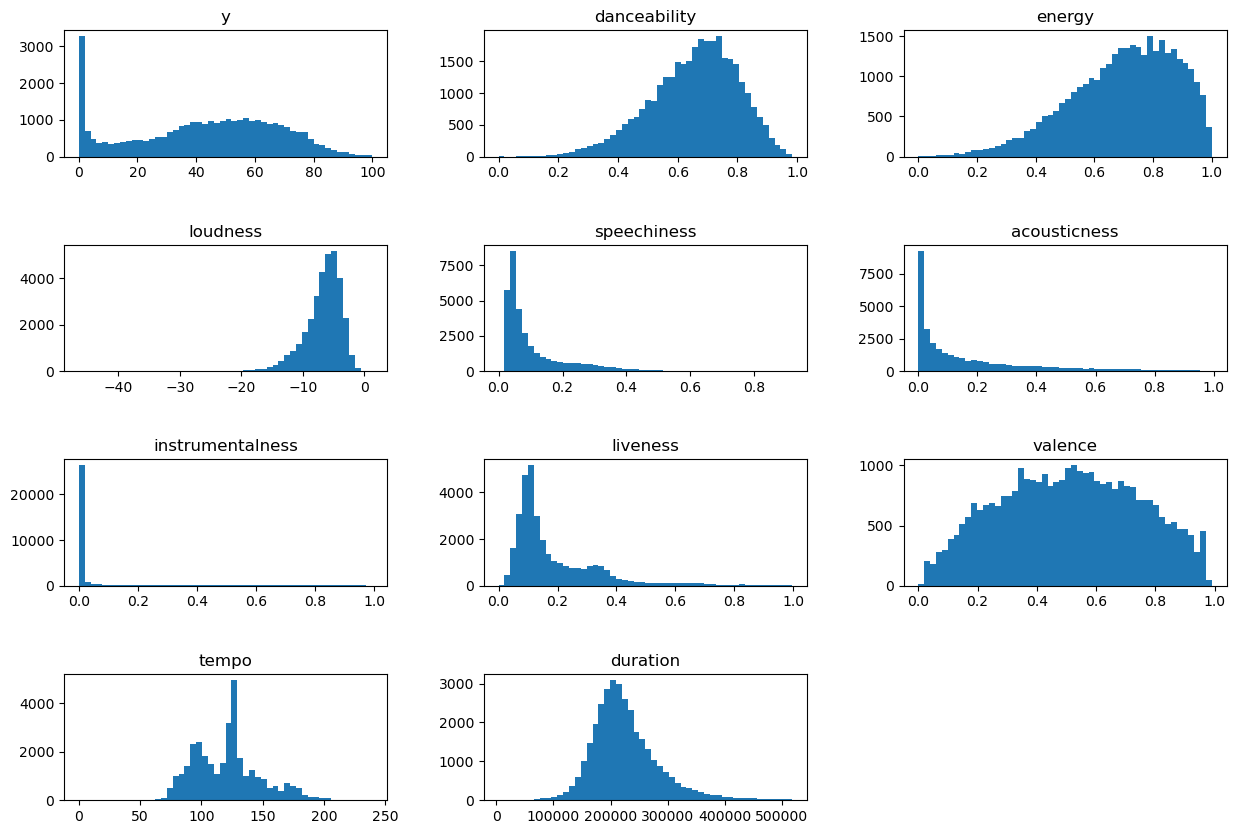

In [180]:
df_num.hist(figsize=(15,10), grid=False, bins=50)
plt.subplots_adjust(hspace=0.7);

<div class="alert alert-block alert-info">The distribution for valence is pretty normal. For tempot we see a high peak for songs with values around 125bpm. Speechiness, acousticness, instrumentalness, and liveness are all highly right skewed, while loudness is highly left skewed.</div>

In [193]:
def boxplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=2, hspace=0.2)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.boxplot(x=col, data=df_num)
        ax.set(xlabel=col, ylabel='')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function adapeted from Capstone 1 exploratory analysis

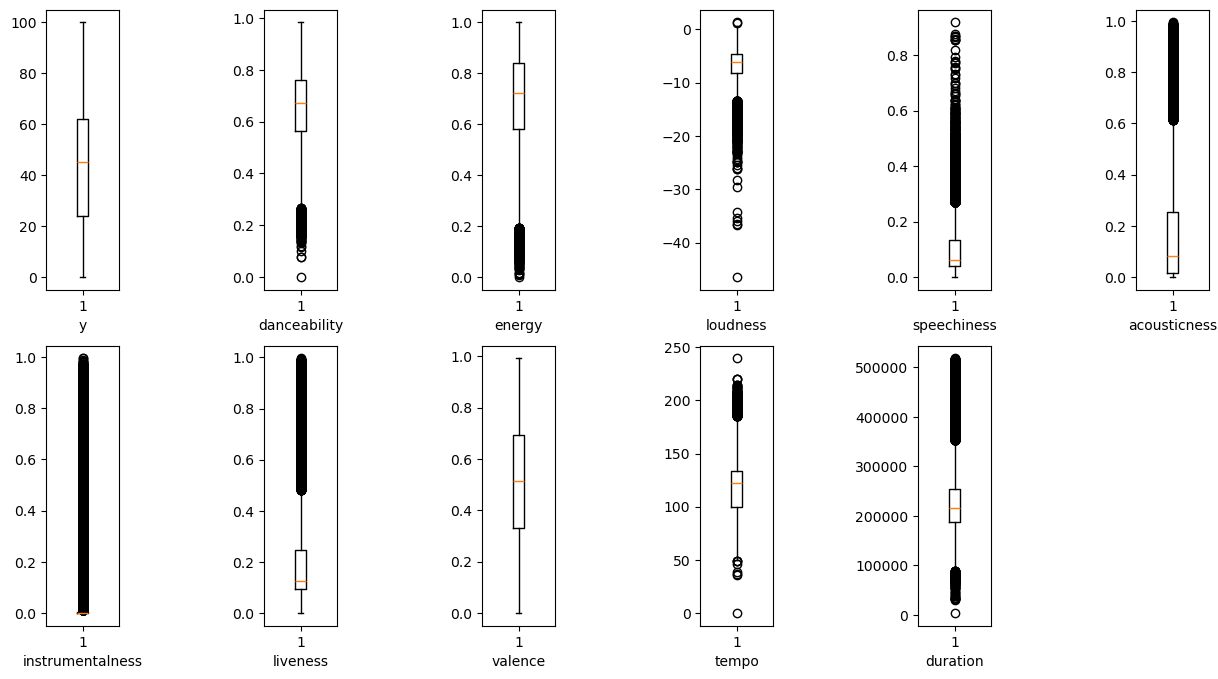

In [194]:
boxplots(list(df_num.columns), ncol=6, figsize=(15, 8))

In [204]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False, sharey=True)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'y', data=df_num, alpha=0.05)
        ax.set(xlabel=col, ylabel='popularity')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function derived from Capstone 1 exploratory analysis

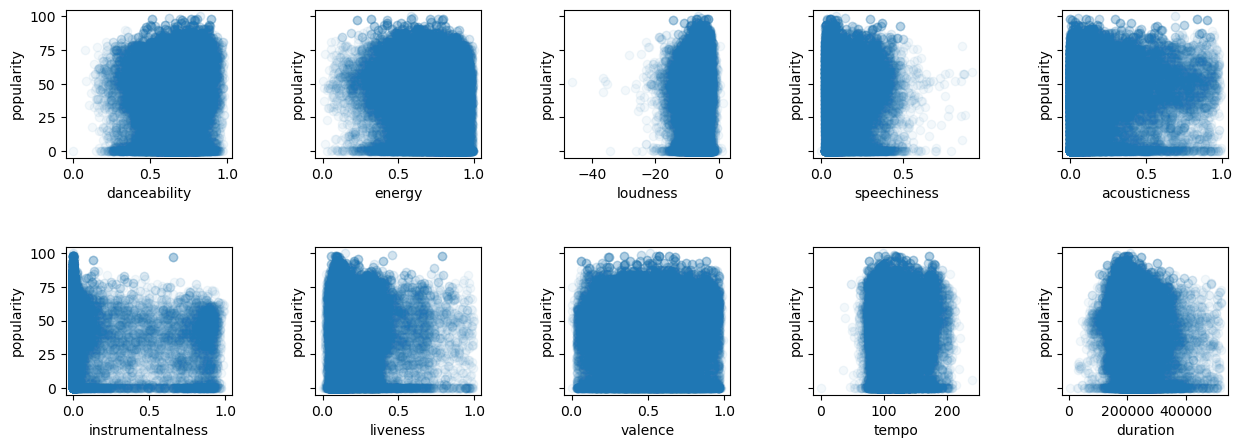

In [205]:
scatterplots(list(df_num.drop(columns='y').columns), ncol=5, figsize=(15, 5))

In [207]:
df_num.corr()

,y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
y,1.000000,0.064748,-0.109112,0.057687,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.025335,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.676625,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611
loudness,0.057687,0.025335,0.676625,1.000000,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
speechiness,0.006819,0.181721,-0.032150,0.010339,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.024519,-0.539745,-0.361638,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,-0.008655,0.033247,-0.147824,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,-0.123859,0.161223,0.077613,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138
valence,0.033231,0.330523,0.151103,0.053384,0.064659,-0.016845,-0.175402,-0.020560,1.000000,-0.025732,-0.032225
tempo,-0.005378,-0.184084,0.149951,0.093767,0.044603,-0.112724,0.023335,0.021018,-0.025732,1.000000,-0.001412


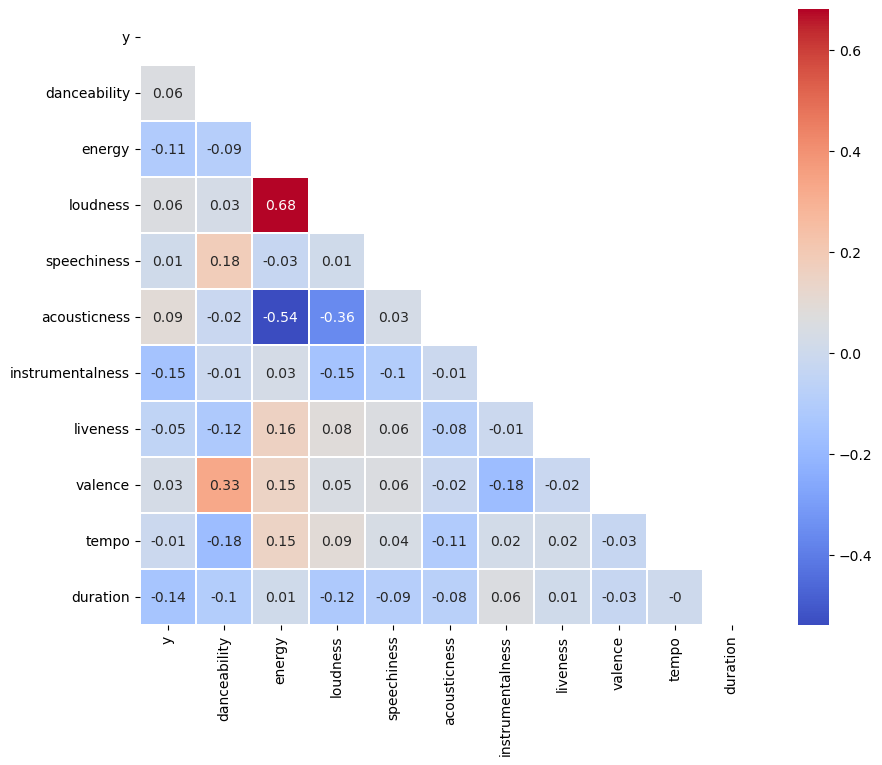

In [214]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df_num.corr(),2),linewidths=.1,cmap='coolwarm', annot=True, mask=np.triu(df_num.corr()))
plt.yticks(rotation=0);

In [220]:
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,...,0,0,0,0,0,0,0,1,0,0
1,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,...,1,0,0,0,0,0,0,0,0,0
2,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,...,0,0,1,0,0,0,0,0,0,0
3,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,...,0,0,0,0,0,0,0,0,1,0
4,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,...,0,0,1,0,0,0,0,0,0,0


In [221]:
df.shape

(32833, 54)

In [222]:
df.isnull().sum()

y                                     0
danceability                          0
energy                                0
loudness                              0
speechiness                           0
acousticness                          0
instrumentalness                      0
liveness                              0
valence                               0
tempo                                 0
duration                              0
mode                                  0
genre_edm                             0
genre_latin                           0
genre_pop                             0
genre_r&b                             0
genre_rap                             0
genre_rock                            0
subgenre_album rock                   0
subgenre_big room                     0
subgenre_classic rock                 0
subgenre_dance pop                    0
subgenre_electro house                0
subgenre_electropop                   0
subgenre_gangster rap                 0


In [223]:
df.to_csv('spot_30k_clean.csv')